In [26]:
import cv2
import numpy as np

img = cv2.imread('mt_r.jpg')

In [4]:
px = img[100,100]
print (px)

[255 250 241]


In [5]:
blue = img[100,100,0]
print (blue)

255


In [6]:
img[100,100] = [255,255,255]
print (img[100,100])


[255 255 255]


In [7]:
img.item(10,10,2)

198

In [8]:
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [9]:
print (img.shape)

(434, 702, 3)


In [10]:
print (img.size)

914004


In [11]:
print (img.dtype)

uint8


In [12]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

In [20]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

In [25]:
img[:,:,2] = 0

In [16]:
for x in range(100):
    for y in range(100):
        img.itemset((200+x,200+y,1),255)

In [27]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

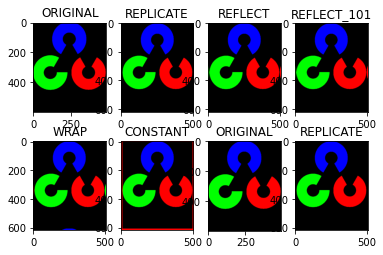

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('opencv_logo.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(241),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(242),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(243),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(244),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(245),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(246),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.subplot(247),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(248),plt.imshow(replicate,'gray'),plt.title('REPLICATE')


plt.show()

In [2]:
import cv2
import numpy as np

In [2]:
x = np.uint8([250])
y = np.uint8([10])

print (cv2.add(x,y)) 

print (x+y)

[[255]]
[4]


In [5]:
img1 = cv2.imread('ml_b.jpg')
img2 = cv2.imread('opencv_logo_s.png')


dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('image',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# Load two images
img1 = cv2.imread('ml_b.jpg')
img2 = cv2.imread('opencv_logo_s.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()